In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pickle

In [57]:
df = pd.read_csv(r"C:\Users\ugc\Downloads\medical_insurance.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [60]:
ohe = LabelEncoder()

In [61]:
arr = ohe.fit_transform(df["sex"])

In [62]:
df["sex"] = arr

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 68.1+ KB


In [64]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [65]:
arr2 = ohe.fit_transform(df["smoker"])

In [66]:
df["smoker"] = arr2

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [68]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [69]:
lbl = OneHotEncoder()

In [70]:
arr3 = lbl.fit_transform(df[["region"]])

In [71]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [72]:
df[lbl.categories_[0]] = arr3.toarray()

In [73]:
df.drop("region",axis=1,inplace=True)

In [74]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='age'>

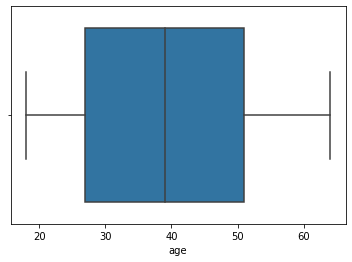

In [76]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

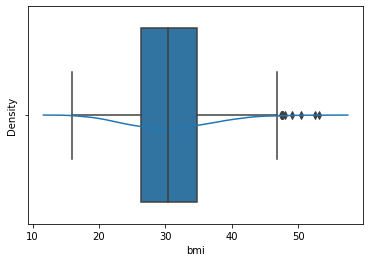

In [78]:
sns.boxplot(x=df["bmi"])



<AxesSubplot:xlabel='bmi', ylabel='Density'>

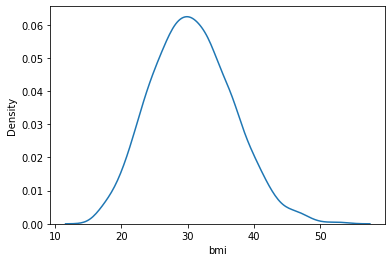

In [79]:
sns.kdeplot(df["bmi"])

In [82]:
x = df.drop("charges",axis=1)
y =df["charges"]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [85]:
model = LinearRegression()

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)

In [97]:
r2=r2_score(y_test,y_pred)

In [98]:
r2

0.7570564375401183

In [99]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [108]:
age =19
sex ='male'
bmi = 33
children = 2
smoker= 'yes'
region ='southeast'

In [109]:
sex_values={'male':1,'female':0}
smoker_values = {'yes':1,'no':0}
region_values ={'southeast':1,'southwest':2,'northeast':3,'northwest':4}

In [107]:
array = np.zeros(x.shape[1],dtype =int)
array[0]=age
array[1]=sex_values[sex]
array[2]=bmi
array[3]=children
array[4]=smoker_values[smoker]
array[5]=region_values[region]

In [110]:
model.predict([array])

c:\users\ugc\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28916.73343085])

In [113]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)